In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [278]:
from sklearn.datasets import fetch_california_housing

In [279]:
data=fetch_california_housing()

In [280]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [281]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [282]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [283]:
df=pd.DataFrame(data.data, columns=data.feature_names)

In [284]:
df['Price']=data.target

In [285]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [286]:
# mulitcollinearty>> when one featurte is explained by all other feature (more than two featurte)
# when two feature>> correlation
# more than two feature relationship>> VIF, Clustermap

<Axes: >

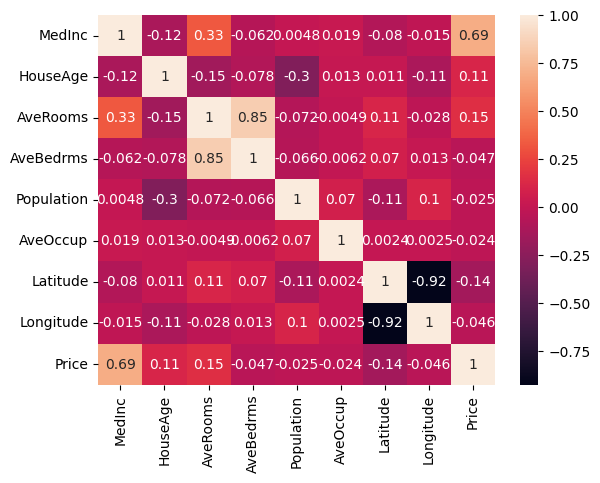

In [287]:
sns.heatmap(df.corr(), annot=True)

<Axes: >

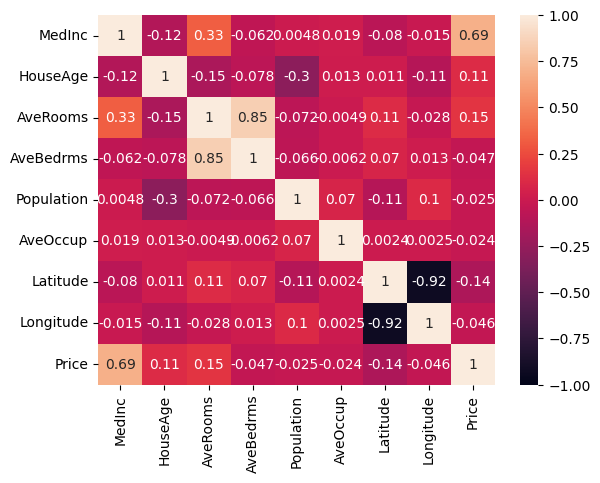

In [288]:
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)

<Figure size 500x500 with 0 Axes>

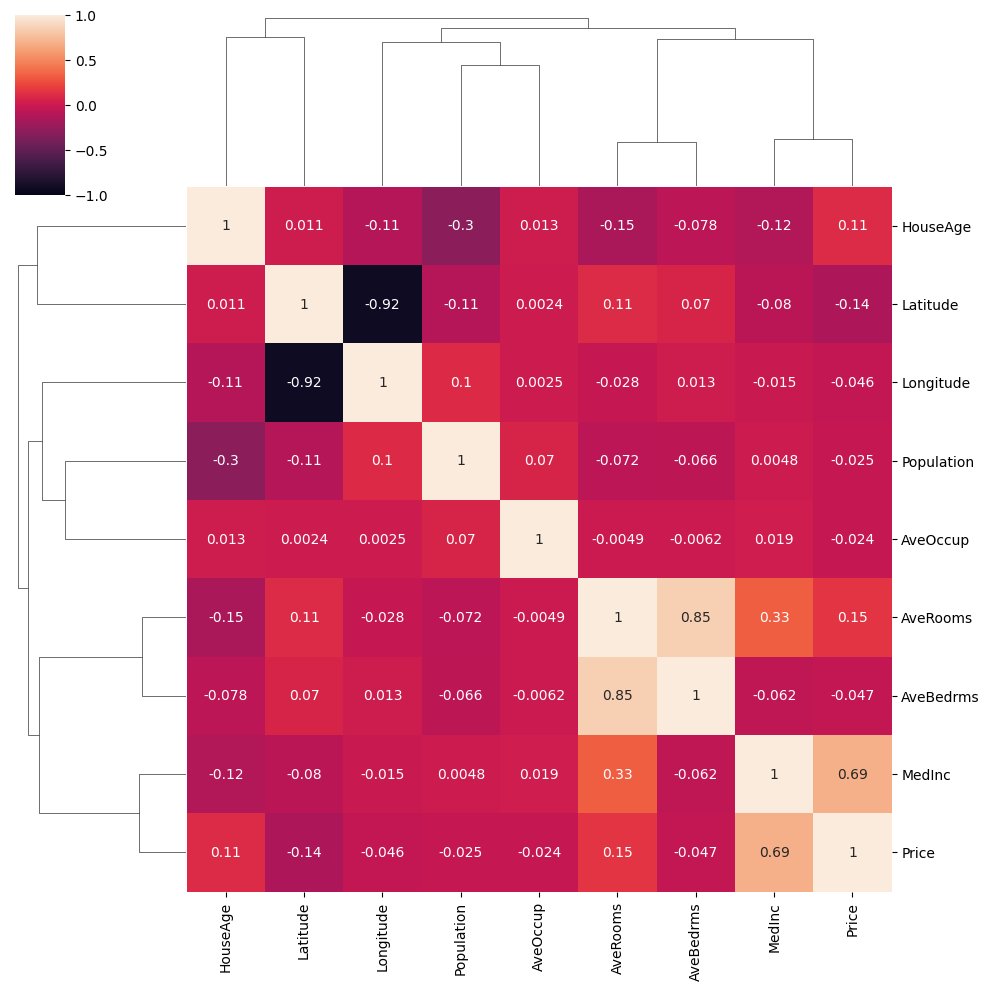

In [289]:
# clustermap table>> it shows group(cluster) relationship

plt.figure(figsize=(5,5))
sns.clustermap(df.corr(), vmin=-1, vmax=1, annot=True)

In [290]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [291]:
vif=pd.DataFrame() # empty dataframe

In [292]:
vif

""


In [293]:
type(vif)

pandas.core.frame.DataFrame

In [294]:
vif['Feature']=df.columns

In [295]:
vif

,Feature
0,MedInc
1,HouseAge
2,AveRooms
3,AveBedrms
4,Population
5,AveOccup
6,Latitude
7,Longitude
8,Price


In [296]:
vif['VIF']=[variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

# variance_inflation_factor(df.values, i):

# variance_inflation_factor is a function from the statsmodels.stats.outliers_influence module.
# df.values returns the values of the DataFrame df as a 2D NumPy array.
# i is the index of the feature column for which VIF is being calculated.
# This function calculates the VIF for the i-th feature in the array.
# for i in range(len(df.columns)):

# This part of the code creates a list comprehension to iterate over all feature columns in the DataFrame.
# len(df.columns) gives the number of columns in the DataFrame.
# range(len(df.columns)) generates a range of indices from 0 to the number of columns - 1.
# [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]:

# This list comprehension calculates the VIF for each feature column in the DataFrame and creates a list of VIF values.
# vif['VIF'] = [...]:

# This part assigns the list of VIF values to the 'VIF' column of the DataFrame vif.



In [297]:
vif    # vif=1/1-R2

# Medinc ~ [1:8]
#   y        X --->regression model ----->R2----->vif =  1/1-R2 = 19.624998  happed for each feature

,Feature,VIF
0,MedInc,19.624998
1,HouseAge,7.592663
2,AveRooms,47.956351
3,AveBedrms,45.358192
4,Population,2.936078
5,AveOccup,1.099530
6,Latitude,568.497332
7,Longitude,640.064211
8,Price,9.285659


In [298]:
df.values

array([[   8.3252    ,   41.        ,    6.98412698, ...,   37.88      ,
        -122.23      ,    4.526     ],
       [   8.3014    ,   21.        ,    6.23813708, ...,   37.86      ,
        -122.22      ,    3.585     ],
       [   7.2574    ,   52.        ,    8.28813559, ...,   37.85      ,
        -122.24      ,    3.521     ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,   39.43      ,
        -121.22      ,    0.923     ],
       [   1.8672    ,   18.        ,    5.32951289, ...,   39.43      ,
        -121.32      ,    0.847     ],
       [   2.3886    ,   16.        ,    5.25471698, ...,   39.37      ,
        -121.24      ,    0.894     ]])

In [299]:
vif.values

array([['MedInc', 19.62499781446958],
       ['HouseAge', 7.592662692610192],
       ['AveRooms', 47.9563513934456],
       ['AveBedrms', 45.358192447574105],
       ['Population', 2.9360782795808618],
       ['AveOccup', 1.099530197828942],
       ['Latitude', 568.497332024351],
       ['Longitude', 640.0642113292109],
       ['Price', 9.285658653476577]], dtype=object)

In [300]:
vif

,Feature,VIF
0,MedInc,19.624998
1,HouseAge,7.592663
2,AveRooms,47.956351
3,AveBedrms,45.358192
4,Population,2.936078
5,AveOccup,1.099530
6,Latitude,568.497332
7,Longitude,640.064211
8,Price,9.285659


In [301]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [302]:
df1=df.copy()

In [303]:
df1

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [304]:
df1.drop('Longitude', axis=1, inplace=True)  # drop the higesht

In [305]:
df1

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,3.422
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,0.847


In [306]:
vif=pd.DataFrame()
vif['Feature']=df1.columns
vif['VIF']=[variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]


In [307]:
vif

,Feature,VIF
0,MedInc,18.639889
1,HouseAge,7.346583
2,AveRooms,44.714760
3,AveBedrms,42.072000
4,Population,2.796280
5,AveOccup,1.099394
6,Latitude,22.873934
7,Price,9.193500


In [308]:
df1.drop('AveRooms', axis=1, inplace=True)
# statistically we are droping the AveRooms but in real it is very important feature so before drop it discuss with business team

In [309]:
vif=pd.DataFrame()
vif['Feature']=df1.columns
vif['VIF']=[variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]

In [310]:
vif

,Feature,VIF
0,MedInc,10.584081
1,HouseAge,7.260588
2,AveBedrms,6.440667
3,Population,2.762794
4,AveOccup,1.098719
5,Latitude,22.094483
6,Price,8.674858


In [311]:
df1.drop('Latitude', axis=1, inplace=True)

In [312]:
vif=pd.DataFrame()
vif['Feature']=df1.columns
vif['VIF']=[variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]

In [313]:
vif  # now vif for all feature is less than 10>> now we can make the model

,Feature,VIF
0,MedInc,8.855104
1,HouseAge,4.156145
2,AveBedrms,4.264253
3,Population,2.223926
4,AveOccup,1.098671
5,Price,8.607339


In [314]:
df1

,MedInc,HouseAge,AveBedrms,Population,AveOccup,Price
0,8.3252,41.0,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,1.081081,565.0,2.181467,3.422
...,...,...,...,...,...,...
20635,1.5603,25.0,1.133333,845.0,2.560606,0.781
20636,2.5568,18.0,1.315789,356.0,3.122807,0.771
20637,1.7000,17.0,1.120092,1007.0,2.325635,0.923
20638,1.8672,18.0,1.171920,741.0,2.123209,0.847


In [315]:
X=df1.iloc[:,:-1]
y=df1.iloc[:,-1]

In [316]:
X

,MedInc,HouseAge,AveBedrms,Population,AveOccup
0,8.3252,41.0,1.023810,322.0,2.555556
1,8.3014,21.0,0.971880,2401.0,2.109842
2,7.2574,52.0,1.073446,496.0,2.802260
3,5.6431,52.0,1.073059,558.0,2.547945
4,3.8462,52.0,1.081081,565.0,2.181467
...,...,...,...,...,...
20635,1.5603,25.0,1.133333,845.0,2.560606
20636,2.5568,18.0,1.315789,356.0,3.122807
20637,1.7000,17.0,1.120092,1007.0,2.325635
20638,1.8672,18.0,1.171920,741.0,2.123209


In [317]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64

In [318]:
from sklearn.model_selection import train_test_split

In [319]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.30, random_state=1)

In [320]:
X_train.shape, X_test.shape

((14448, 5), (6192, 5))

In [321]:
y_train.shape, y_test.shape

((14448,), (6192,))

In [322]:
# scalling: 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [323]:
# model traingin: 
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [324]:
model

LinearRegression()

In [325]:
model.fit(X_train, y_train)

LinearRegression()

In [326]:
model.coef_

array([ 0.8295202 ,  0.23888438,  0.02058888,  0.03902186, -0.05185743])

In [327]:
model.intercept_

2.0765314825581394

In [328]:
y_pred=model.predict(X_test)

In [329]:
y_pred

array([1.99486815, 1.39443153, 2.46691805, ..., 1.83891855, 1.28083607,
       1.20666527])

In [330]:
# model evaluation

In [331]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [332]:
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.6544937093127864
0.6046846522578225
0.8090078549141451


In [333]:
score=r2_score(y_test, y_pred)

In [334]:
score

0.5021661718778507

In [335]:
X_test.shape[1]

5

In [336]:
adjusted_r2=1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [337]:
adjusted_r2   # lesser diff. it means there are no irrelavent features added

0.5017637843672444

Implementation using RFE

In [338]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [339]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [340]:
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [341]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.30, random_state=1)

In [342]:
X_train.shape, X_test.shape

((14448, 8), (6192, 8))

In [343]:
y_train.shape, y_test.shape

((14448,), (6192,))

In [344]:
# RFE >> REcursive feature elimination
from sklearn.feature_selection import RFE

In [345]:
rfe=RFE(estimator=LinearRegression(), n_features_to_select=5)

In [347]:
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [349]:
y_pred=rfe.predict(X_test)

In [350]:
y_pred

array([2.0350473 , 0.84136588, 2.59488541, ..., 1.71552749, 1.74453119,
       1.55503299])

In [352]:
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [351]:
rfe.support_

array([ True, False,  True,  True, False, False,  True,  True])

In [353]:
rfe.ranking_  # 1 selected

array([1, 2, 1, 1, 4, 3, 1, 1])